### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=4
max_qubits=12
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources

# num_shots=100

# Need this path set for imports used below
import sys
sys.path[1:1] = [ "../..", "../../_common" ]


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }
# import metrics
# metrics.QV = 32

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre',
#                         "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) }


HHL Benchmark Program - Qiskit
... execution starting at Jul 09, 2023 04:45:00 UTC
************
Executing 3 circuits with 4 qubits, using 1 input qubits and 1 clock qubits
************
Executing 3 circuits with 5 qubits, using 1 input qubits and 2 clock qubits
************
Executing 3 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 11, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 116, 0.299, 50.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.008, 3.57, 0.25 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.998, 0.977

************
Executing 3 circuits with 7 qubits, using 2 input qubits and 2 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 13, 0.0
Average Normalized Transpiled Depth, ξ (

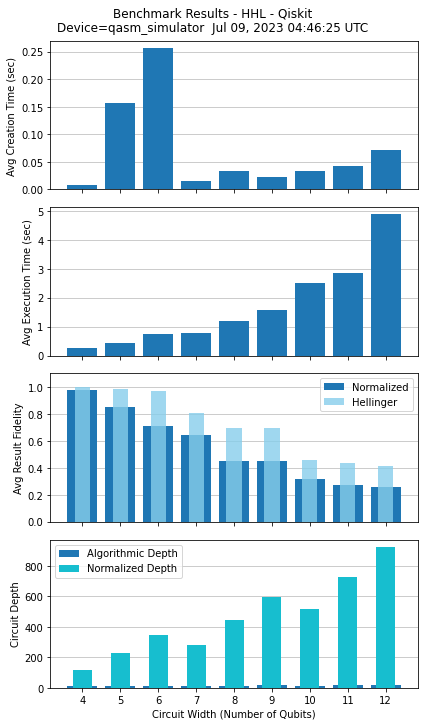

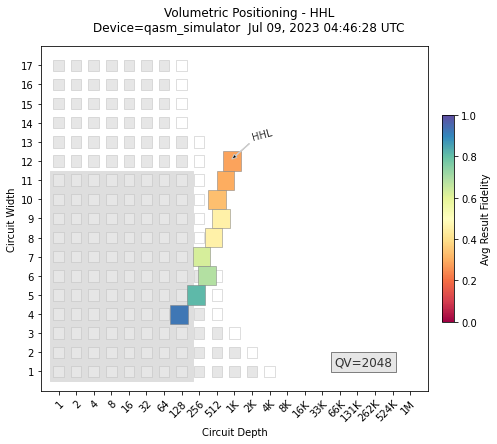

In [3]:
#%run hhl/qiskit/hhl_benchmark.py
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at Jul 09, 2023 04:12:19 UTC
************
Executing 3 circuits with 5 qubits, using 1 input qubits and 2 clock qubits
************
Executing 3 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
************
Executing 3 circuits with 7 qubits, using 2 input qubits and 2 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 13, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 227, 0.311, 104.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.272, 5.051, 0.4 secs
Average Transpiling, Validating, Running Times for group 5 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 0.984, 0.84

************
Executing 3 circuits with 8 qubits, using 2 input qubits and 3 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 15, 0.0
Average Normalized Transpiled Depth, ξ (

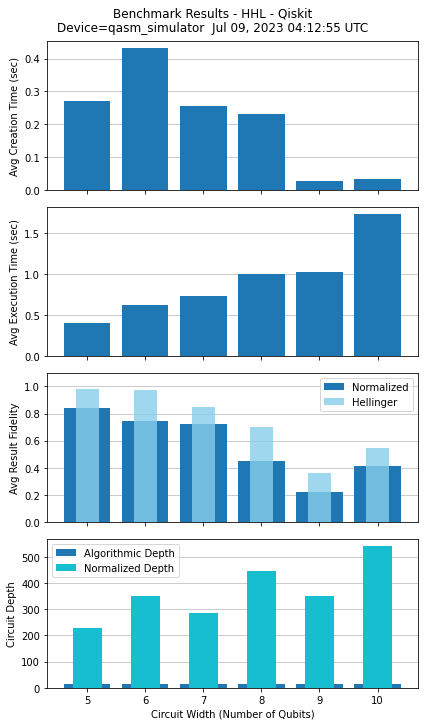

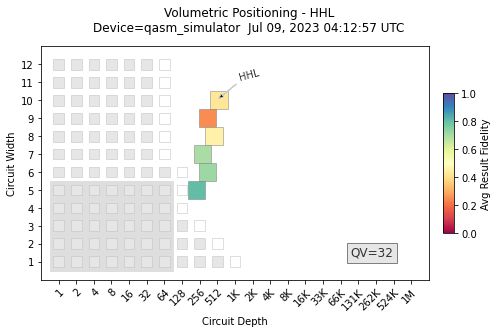

In [4]:
#%run hhl/qiskit/hhl_benchmark.py
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

# This run2 method allows you to specify an arbitrary range of input and clock qubit sizes

min_input_qubits=1
max_input_qubits=3
min_clock_qubits=2
max_clock_qubits=3

hhl_benchmark.run2(min_input_qubits=min_input_qubits, max_input_qubits=max_input_qubits,
                 min_clock_qubits=min_clock_qubits, max_clock_qubits=max_clock_qubits,
                 max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

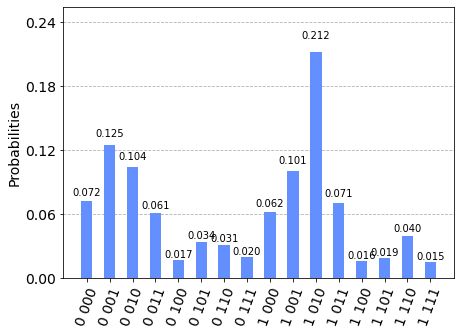

In [5]:
from qiskit.visualization import plot_histogram

# Get the counts, the frequency of each answer
counts = hhl_benchmark.saved_result.get_counts()

# Display the results
plot_histogram(counts)

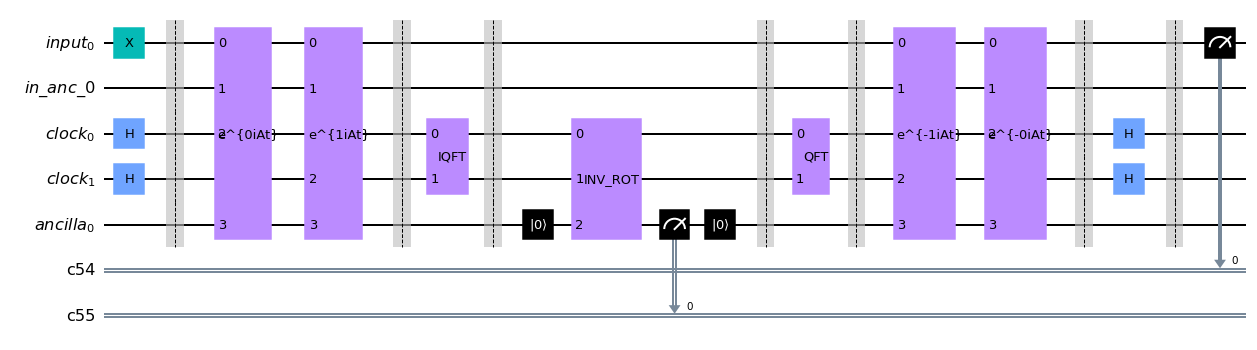

In [6]:
hhl_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)